# 11. Sets, Logic, and Categories

> ... almost all the objects of Mathematics can be described as sets: A natural number is a set of sets (a cardinal), a rational number is set of pairs (an equivalence class), a real number is a set of rationsals (a Dedekind cut), and a function is set of ordered pairs (a table of values). Similarly the theorems of Mathematics can all be written as formuulas in a very parsimonious formal language which uses only set-membership, the basic connectives of logic (or, not, there exists) and the needed primitive terms of each subject (thus "point" and "line" for incidence geometry). Finally, most of the proofs of Mathematical theorems can be stated with absolute rigor as a sequence of inferences, each an instance of a finite number of basic schemes of inference.

---

## 1. The Hierarchy of Sets

Recognition of sets as objects of Mathematical study came about in 19th C in 2 ways:

- Dedekind explaining Kummer's ideal numbers as sets of ordinary numbers (& $\mathbb{Q}$)
- Fourier series requiring general sets of real numbers

In [1]:
from sympy.abc import *
from sympy import S
from sympy import FiniteSet
from sympy.sets.conditionset import ConditionSet
from sympy.sets.powerset import PowerSet

S.Naturals

Naturals

In [2]:
naturals_iter = iter(S.Naturals)
for _ in range(1, 4):
    print(next(naturals_iter))

1
2
3


In [3]:
naturals_power = S.Naturals.powerset()
naturals_power

PowerSet(Naturals)

In [4]:
print(naturals_power.contains(S.Naturals))
print(S.Naturals.contains(naturals_power))

True
False


In [5]:
A = FiniteSet(1, 2, 3)
A

FiniteSet(1, 2, 3)

In [6]:
PA = A.powerset()
PA

FiniteSet(FiniteSet(1), FiniteSet(1, 2), FiniteSet(1, 3), FiniteSet(1, 2, 3), FiniteSet(2), FiniteSet(2, 3), FiniteSet(3), EmptySet)

In [7]:
A.intersection(PA)

Intersection(FiniteSet(EmptySet), FiniteSet(1, 2, 3))

In [8]:
S.EmptySet

EmptySet

In [9]:
S.EmptySet.powerset()

FiniteSet(EmptySet)

In [10]:
S.EmptySet.powerset().powerset()

FiniteSet(EmptySet, FiniteSet(EmptySet))

In [11]:
def cumulative_hierarchy(alpha):
    """ This quickly goes out of control with alpha > 4 """
    x = S.EmptySet
    for _ in range(0, alpha):
        x = x.powerset()
    return x

cumulative_hierarchy(3)

FiniteSet(EmptySet, FiniteSet(EmptySet), FiniteSet(FiniteSet(EmptySet)), FiniteSet(EmptySet, FiniteSet(EmptySet)))

---

## 2. Axiomatic Set Theory

The Zermelo-Fraenkel axiom system (ZF) is standard & begins with the definition:

$$
x = y \Leftrightarrow x \subset y \enspace \& \enspace y \subset x
$$

Following is the list of axioms:

*Extensionality*

$$
x = y \enspace \& \enspace y \in z \enspace \text{imply} \enspace x \in z
$$

*Null set*

There is a set $\varnothing$ with no elements

*Pairing*

For any sets $x$ and $y$ there is a set $u$ so that, for all $t$,

$$
t \in u \Leftrightarrow (t = x \enspace or \enspace t = y)
$$

*Power set*

For any set $x$ there is a set $u$ with, for all $s$,

$$
s \in u \Leftrightarrow (s \subset x)
$$

*Union*

For any set $x$ there is a set $u$ with, for all $t$,

$$
t \in u \Leftrightarrow \text{There is an} \enspace s \enspace \text{with} \enspace t \in s \in x
$$

*Infinity*

There exists a set $\omega$ with $\varnothing \in \omega$ and such that $x \in \omega$ implies $s(x) \in \omega$

*Comprehension*

For any set $u$ and any property $P$ of elements of $u$ there is a set $s$ with

$$
x \in s \Leftrightarrow x \in u \enspace \text{and} \enspace x \enspace \text{has} \enspace P
$$

This is sometimes called the *axiom of separation*.
It is actually a family of axioms, one for each property $P$; it is thus called an *axiom scheme*.

The "property" $P$ of $x$ means something specified by an explicit set-theoretic formula.

*Regularity*

If a set $x$ is not empty it has an element $w$ which has no elements in common with $x$.

$$
x \ne \varnothing \Rightarrow (\exists w) \enspace w \in x \enspace \text{and} \enspace x \cap w = \varnothing
$$

The axiom of regularity is also called the axiom of *foundation*: given a set $y_0$, there is no infinite regress of elements of its elements.

*Choice*

For every set $x$ with no non-empty members $y$ there is a function $f$ with domain $x$ such that $f(y) \in y$ for each $y \in x$

*Replacement*

If $R(x,y)$ is a formula stated in terms of the sets $x, y$ and the membership relation while $u$ is a set such that for each $x \in u$ there is exactly one $y$ with $R(x,y)$, then there is a set consisting of exactly all these $y$.

---

## 3. The Propositional Calculus

In [12]:
import re
from itertools import product
from sympy import sympify
from sympy import true, false

def logic_table(expr):
    """ Pass a function to test all logical results. """
    args = expr.atoms()
    for prod in product((true, false), repeat = len(args)):
        expr_str = expr
        for x in zip(args, prod):
            target = r"\b" + str(x[0]) + r"\b"
            replace = str(x[1])
            expr_str = re.sub(target, replace, str(expr_str))
        result = str(expr.subs(zip(args, prod)))
        print(str(expr_str) + " = " + result)

In [13]:
conjunction = p & q
logic_table(conjunction)

True & True = True
False & True = False
True & False = False
False & False = False


In [14]:
disjunction = p | q
logic_table(disjunction)

True | True = True
False | True = True
True | False = True
False | False = False


In [15]:
negation = ~p
logic_table(negation)

~True = False
~False = True


In [16]:
implication = p >> q
logic_table(implication)

Implies(True, True) = True
Implies(False, True) = True
Implies(True, False) = False
Implies(False, False) = True


In [17]:
# An example of a 'tautology'; every result is True
tautology = (p & q) >> (p | q)
logic_table(tautology)

Implies(True & True, True | True) = True
Implies(False & True, False | True) = True
Implies(True & False, True | False) = True
Implies(False & False, False | False) = True


---

## 4. First Order Language

For language $L(B,+)$

*Defining terms:*

i. Each variable & each constant is a term

ii. If $+$ is a binary function symbol & $s$ and $t$ are terms, then $s + t$ is a term

*Defining formulas:*

iii. If $B$ is a binary predicate symbol while $s$ and $t$ are terms, then $B(s,t)$ is a formula

iv. If $F$ is a formula, so is $\neg F$

v. If $F$ and $G$ are formulas, so if $F \vee G$

vi. If $x$ is a variable while $F$ is a formula, so are $(\forall x)F$ and $(\exists x)F$

Values can be:

- bound in a formula to a specific value (or set of), by $\forall$ or $\exists$
- free to represent any value in a domain

> It is a striking observation about actual Mathematical systems that the primitive functions involvedd are almost all unary or binary (successor or product), while the primitive predicates *B* are usually unary or binary. There are occassional exeptions, such as the ternary betweenness relation in the foundations of geometry; even then one gets rid of "betweenness" as quickly as possible by defining it in terms of the "less than" relation for real number coordinates. On the other hand, there is clearly no way in which binary relations or functions could all be replaced by unary ones. In philosophical terms, everything cannot be reducted to properties (unary predicates) of things, as was the apparent intent of Aristotelian logic.

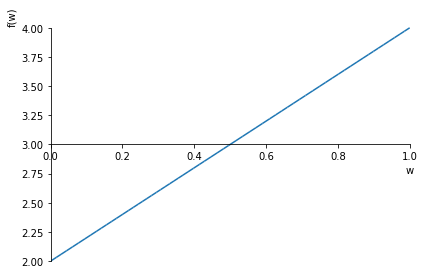

In [18]:
from sympy.plotting import plot

# The weighted average
p, q, w = symbols("p q w")
expr = ((1 - w) * p) + (w * q)
plot(expr.subs([(p, 2), (q, 4)]), (w, 0, 1))

- *first order* = quantifers involve variables ranging over 1 domain
- *two-sorted* = 2 types of variables range over 2 different domains
- *second order* = quantifiers on variables which range over predicates or sets

> For most Mathematics, the appropriate axioms for set theory seem to be ZBQC: The Zermelo axioms with comprehension replaced by bounded comprehension and with choice added.

---

## 5. The Predicate Calculus

In [19]:
from sympy.logic.boolalg import Equivalent

def F(x):
    return ~x

def G(x):
    return ~~x

tautology = (F(x) >> G(x)) >> (~G(x) >> ~F(x))
logic_table(tautology)

True = True


In [20]:
tautology = Equivalent(F(x), ~~F(x))
logic_table(tautology)

True = True


> A *formal proof* in a predicate language is a finite sequence of formulas of that language in which each formula is either an axiom or results from prior formulas of the sequence by one of the rules of inference.

The axioms are:

i. All tautologies of the language

ii. For each term $t$ and for each formula $F(x)$ with a free variable, all formulas of either of the forms:

$$
((\forall x)F(x)) \implies F(t), F(t) \implies (\exists x)F(x)
$$

The rules of inference are:

iii. Modus Ponens: From $F$ and $F \implies G$ infer $G$

iv. Generalization; if the variable $x$ does not occur free in $F$:

iv.a. From $F \implies G(x)$ infer $F \implies (\forall x) G(x)$

iv.b From $G(x) \implies F$ infer $((\exists x) G(x)) \implies F$

---

## 6. Precision and Understanding

> A Mathematical proof is rigorous when it is (or could be) written out in first order predicate language $L(\in)$ as a sequence of inferences from the axioms ZFC, each inference made according to one of the stated rules.

> For the concept of rigor we make a historical claim: That rigor is absolute and here to stay. The future may see additional axioms for ests or alternatives to set theory or perhaps new more efficient ways of recording (or discovering) proofs, but the notion of a rigorous proof as a series of formal steps in accordance with prescribed rules of inference will remain.

---

## 7. Godel's Incompleteness Theorems

> In general, a *contradiction* in a formal system arises when there is a sentence $p$ of the system and proofs of both $p$ and $\neg p$. In view of the tautology $p \land \neg p \implies q$, the presence of such a contradiction allows the proof in the system of any sentence $q$. Hilbert aspired to obtain a secure foundation for Mathematics by providing that a suitable formal system (including at least arithmetic and analysis) is *consistent* in the sense that it has no contradictions.

In [21]:
# Given Russel's Paradox, where P & not P can both be proved then
tautology = (p & ~p) >> q
logic_table(tautology)
# That's annoying!

Implies(True & ~True, True) = True
Implies(False & ~False, True) = True
Implies(True & ~True, False) = True
Implies(False & ~False, False) = True


> ... Kurt Godel, using a subtle diagonal argument, proved an "incompleteness" theorem which showed that Hilber's objective can not be reached, except perhaps by some novel extension of the Hilbert idea of finite methods. Godel considered a formal theory $T$ which contained ordinary arithmetic, which is consistent (in a strong sense to be explained) and in which the axioms and rules of inference are either finite in number or are specfied in a recursive way; the latter is the case for all the systems we have considered. In this system $T$ he showed how to construct a sentence $G$ such that neither $G$ nor $\neg G$ could be proved within the system. Such a $G$ is then undecidable. Its existence is Godel's first incompleteness theorem.

> Since the rules of $T$ are recursive, Godel also showed that one can formulate within the system $T$ a sentence $\text{con}_T$ which, when interpreted, states that "$T$ is consistent", he then showed that this sentence could not be proved within the system. In other words, no such system $T$ is strong enough to establish its own consistency ... It is this second Godel incompleteness theorem which blocks the Hilbert program.

---

## 8. Independence Results

> For Zermelo-Fraenkel set theory many sentences - including a number of interesting ones - are independent of the axioms and so remain undecided and undecidable. One such is the continuum hypotheses CH, already mentioned: There is no cardinal number between the cardinal of the integers and that of the reals. It turns out that CH can be neither proved nor disproved in ZFC: It is *independent* of ZFC.

However, Godel showed that CH is consistent with ZFC

Other independence results include:

- there are sets of real numbers which are not Lebesgue measurable

> ... many interesting Mathematical questions cannot be settled on the basis of Zermelo-Fraenkel axioms for set theory. Various additional axioms have been proposed, including axioms which insure the existence of some very large cardinal numbers and an axiom of determinacy (for certain games) which in its full form contradicts the axiom of choice. This variety and the undecidability results indicate that set theory is indeterminate in principle: There is no unique and definitive list of axioms for sets; the intuitive idea of a set as a collection can lead to wildly different and mutually inconsistent formulations. On the elementary level, there are options such as ZFC, ZC, ZBQC or intuitionistic set theory; on the higher level, the method of forcing provides many alternative models with divergent properties The platonic notion that there is somewhere *the* ideal realm of sets, not yet fully desribed, is a glorious illusion.

---

## 9. Cateogries and Functors

In [34]:
from sympy.categories import Object, IdentityMorphism, NamedMorphism

In [24]:
A = Object("A")
B = Object("B")
f = NamedMorphism(A, B, "f")
f

NamedMorphism(Object("A"), Object("B"), "f")

In [25]:
g = NamedMorphism(B, C, "g")
g

NamedMorphism(Object("B"), C, "g")

In [28]:
g * f

CompositeMorphism((NamedMorphism(Object("A"), Object("B"), "f"), NamedMorphism(Object("B"), C, "g")))

In [29]:
h = NamedMorphism(C, D, "h")
h

NamedMorphism(C, D, "h")

In [31]:
h * (g * f)

CompositeMorphism((NamedMorphism(Object("A"), Object("B"), "f"), NamedMorphism(Object("B"), C, "g"), NamedMorphism(C, D, "h")))

In [33]:
h * (g * f) == (h * g) * f

True

In [36]:
id_A = IdentityMorphism(A)
id_B = IdentityMorphism(B)
id_A

IdentityMorphism(Object("A"))

In [37]:
f * id_A

NamedMorphism(Object("A"), Object("B"), "f")

In [38]:
f * id_A == f == id_B * f

True

| Object | Arrow |
| :---|:--|
| set | functions |
| groups | homomorphisms |
| abelian groups | homomorphisms |
| vector spaces | linear transformations |
| inner product spaces | orthogonal transformations |
| topological spaces | continuous maps |
| $C^{\infty}$-manifolds | $C^{\infty}$-maps |

> All these, and many more, are "big" categories. They do not legally exist within ZFC because the collections of all the objects and all the arrows in question are not sets but are "classes", like the class of all sets or the class of all ordinals. These categories also have "small" versions, such as the category of all finite subsets of $\mathbb{N}$ or of all manifolds in $\mathbb{R}^n$.

A category which has a two-sided inverse is called a *groupoid*.

---

## 10. Natural Transformations

A *natural transformation* is any rule where given $F$, $G$ as two functors for $C \leftarrow D$ the action of each functor on the domain and codomain in the categories commutes.

---

## 11. Universals